In [39]:
#import libraries

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import Recall, Precision
import os

In [40]:
# Specify the path to the dataset directory
dataset_path = r"dataset\training_set\training_set"

# Initialize lists to store the image data and corresponding labels
images = []
labels = []

# Process the cat images
cat_path = os.path.join(dataset_path, "cats")
for image_name in os.listdir(cat_path):
    image_path = os.path.join(cat_path, image_name)
    img = load_img(image_path, target_size=(150, 150))  # Load the image and resize it
    img_array = img_to_array(img) / 255.0  # Convert the image to array and normalize pixel values
    images.append(img_array)
    labels.append(0)  # Assign label 0 to cats

# Process the dog images
dog_path = os.path.join(dataset_path, "dogs")
for image_name in os.listdir(dog_path):
    image_path = os.path.join(dog_path, image_name)
    img = load_img(image_path, target_size=(150, 150))  # Load the image and resize it
    img_array = img_to_array(img) / 255.0  # Convert the image to array and normalize pixel values
    images.append(img_array)
    labels.append(1)  # Assign label 1 to dogs

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [42]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate the images by 20 degrees
    width_shift_range=0.1,  # Randomly shift the width by 10%
    height_shift_range=0.1,  # Randomly shift the height by 10%
    horizontal_flip=True  # Randomly flip the images horizontally
)

datagen.fit(X_train)  # Fit the data augmentation generator on the training data


In [43]:
#Create the CNN Model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [44]:
cnn = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, validation_data =(X_test, y_test))


Epoch 1/15
101/101 [==============================] - 72s 699ms/step - loss: 0.7100 - accuracy: 0.5039 - val_loss: 0.6915 - val_accuracy: 0.4794
Epoch 2/15
101/101 [==============================] - 75s 741ms/step - loss: 0.6904 - accuracy: 0.5404 - val_loss: 0.6892 - val_accuracy: 0.5256
Epoch 3/15
101/101 [==============================] - 64s 634ms/step - loss: 0.6724 - accuracy: 0.5723 - val_loss: 0.6165 - val_accuracy: 0.6704
Epoch 4/15
101/101 [==============================] - 60s 592ms/step - loss: 0.6366 - accuracy: 0.6397 - val_loss: 0.5726 - val_accuracy: 0.7253
Epoch 5/15
101/101 [==============================] - 70s 696ms/step - loss: 0.6299 - accuracy: 0.6550 - val_loss: 0.6181 - val_accuracy: 0.6642
Epoch 6/15
101/101 [==============================] - 92s 908ms/step - loss: 0.6148 - accuracy: 0.6597 - val_loss: 0.5762 - val_accuracy: 0.6754
Epoch 7/15
101/101 [==============================] - 76s 749ms/step - loss: 0.5906 - accuracy: 0.6890 - val_loss: 0.6217 - val_ac

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


26/26 [==============================] - 4s 159ms/step - loss: 0.4429 - accuracy: 0.7853
Loss: 0.44291776418685913
Accuracy: 0.7852684259414673


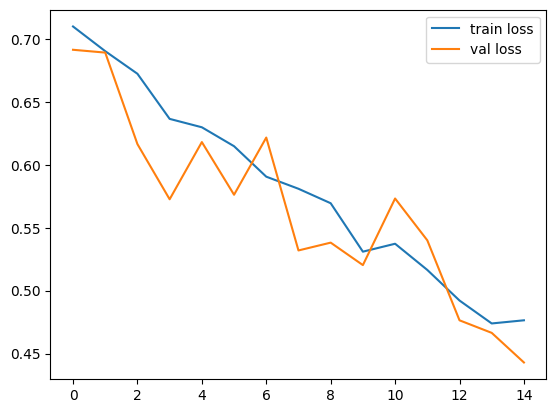

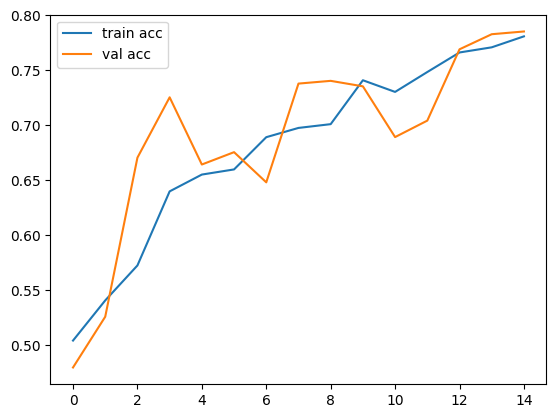

In [46]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(cnn.history['loss'], label='train loss')
plt.plot(cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(cnn.history['accuracy'], label='train acc')
plt.plot(cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()